In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [7]:
movies = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/preprocessed_movielens_1m/movies.csv')
tags = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/preprocessed_movielens_1m/tags.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/preprocessed_movielens_1m/ratings.csv')
users = pd.read_csv('https://raw.githubusercontent.com/nchichilidze/RS-with-GE/main/preprocessed_movielens_1m/users.csv')

movies = movies.iloc[: , 1:]
tags = tags.iloc[: , 1:]
ratings = ratings.iloc[: , 1:]
users = users.iloc[: , 1:]

# Data Exploration

## Movies

In [12]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story,animation children's comedy,1995
1,2,Jumanji,adventure children's fantasy,1995
2,3,Grumpier Old Men,comedy romance,1995
3,4,Waiting to Exhale,comedy drama,1995
4,5,Father of the Bride Part II,comedy,1995


In [8]:
movies.describe()

,movie_id,year
count,3883.000000,3883.000000
mean,1986.049446,1986.066959
std,1146.778349,16.895690
min,1.000000,1919.000000
25%,982.500000,1982.000000
50%,2010.000000,1994.000000
75%,2980.500000,1997.000000
max,3952.000000,2000.000000


In [9]:
movies.shape

(3883, 4)

The number of rows in the movies dataframe is less than the highest index of movie in the dataframe, which means that some indices are omitted and we don't have information on movies at those indices

Text(0, 0.5, 'Number of Movies')

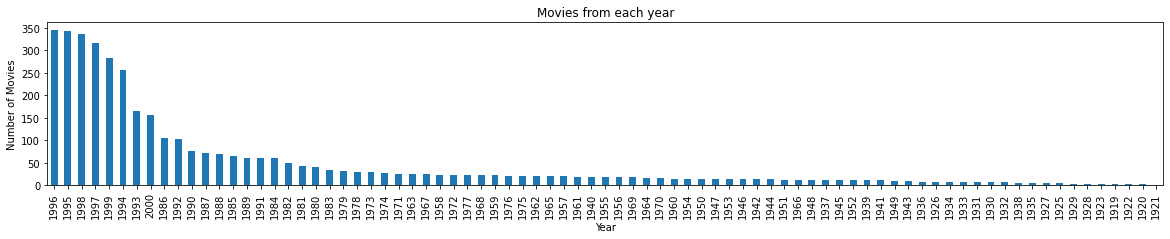

In [24]:
movies['year'].value_counts().plot(kind='bar', figsize=(20, 3))

plt.title("Movies from each year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")

Naturally, the number of movies grows as the years go by

Text(0, 0.5, 'Number of Movies')

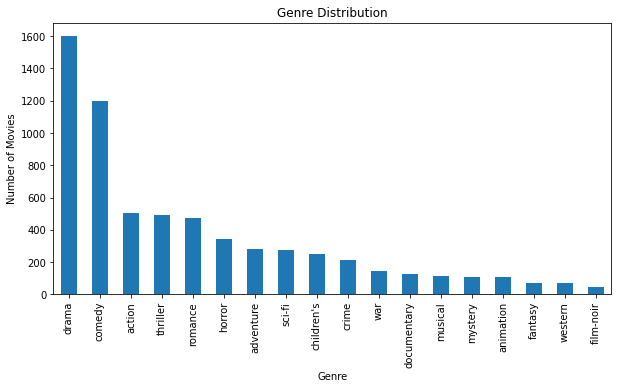

In [30]:
count_genres = movies.genres.str.split(expand=True).stack().value_counts()

count_genres.plot(kind='bar', figsize=(10, 5))

plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")

## Users

In [31]:
users.head()

,user_id,gender,age
0,1,1,1
1,2,0,56
2,3,0,25
3,4,0,45
4,5,0,25


In [32]:
users.describe()

,user_id,gender,age
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,0.282947,30.639238
std,1743.742145,0.450468,12.895962
min,1.000000,0.000000,1.000000
25%,1510.750000,0.000000,25.000000
50%,3020.500000,0.000000,25.000000
75%,4530.250000,1.000000,35.000000
max,6040.000000,1.000000,56.000000


Text(0, 0.5, 'Number of Movies')

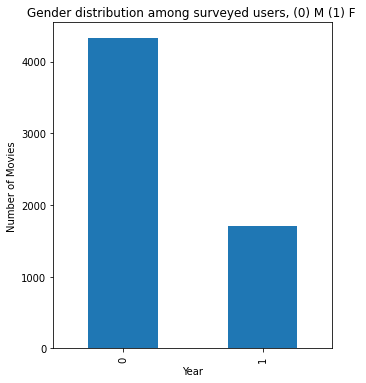

In [36]:
users['gender'].value_counts().plot(kind='bar', figsize=(5, 6))

plt.title("Gender distribution among surveyed users, (0) M (1) F ")
plt.xlabel("Year")
plt.ylabel("Number of Movies")

There is a surprising imbalance

In [37]:
min_age = users['age'].min()
max_age = users['age'].max()

In [46]:
min_age

1

In [48]:
max_age

56

In [47]:
users[users['age'] < 7]

,user_id,gender,age
0,1,1,1
18,19,0,1
50,51,1,1
74,75,1,1
85,86,1,1
...,...,...,...
5843,5844,1,1
5952,5953,0,1
5972,5973,0,1
5988,5989,1,1


Interesting to see that there is a 1 year old among the 'surveyed users' and 222 users are under the age of 7

In [64]:
age_group_incr = (max_age - min_age)/4
age_group_1 = min_age + age_group_incr
age_group_2 = age_group_1 + age_group_incr
age_group_3 = age_group_2 + age_group_incr
age_group_4 = age_group_3 + age_group_incr

In [65]:
print(age_group_1)
print(age_group_2)
print(age_group_3)
print(age_group_4)

14.75
28.5
42.25
56.0


In [66]:
users['age_group'] = users['age']

In [67]:
users.loc[(users.age <= age_group_4),  'age_group'] = 4
users.loc[(users.age <= age_group_3),  'age_group'] = 3
users.loc[(users.age <= age_group_2),  'age_group'] = 2
users.loc[(users.age <= age_group_1),  'age_group'] = 1

In [68]:
users

,user_id,gender,age,age_group
0,1,1,1,1
1,2,0,56,4
2,3,0,25,2
3,4,0,45,4
4,5,0,25,2
...,...,...,...,...
6035,6036,1,25,2
6036,6037,1,45,4
6037,6038,1,56,4
6038,6039,1,45,4


Text(0, 0.5, 'Number of Users')

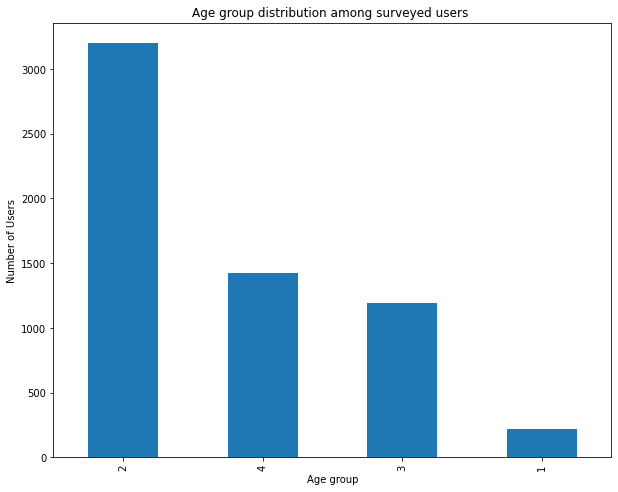

In [69]:
users['age_group'].value_counts().plot(kind='bar', figsize=(10, 8))

plt.title("Age group distribution among surveyed users ")
plt.xlabel("Age group")
plt.ylabel("Number of Users")

age group 2 is 14 - 28 year olds

## Tags

In [75]:
tags = tags.drop(columns=['tag+genre'])

In [74]:
tags

,movie_id,tags,title,genres,year,tag+genre
0,1,pixar pixar pixar animation pixar animated fun...,Toy Story,animation children's comedy,1995,pixar pixar pixar animation pixar animated fun...
1,2,for children game animals joe johnston robin w...,Jumanji,adventure children's fantasy,1995,for children game animals joe johnston robin w...
2,3,funniest movies comedinha de velhinhos engraã ...,Grumpier Old Men,comedy romance,1995,funniest movies comedinha de velhinhos engraã ...
3,4,girl movie comedy drama comedy drama comedy dr...,Waiting to Exhale,comedy drama,1995,girl movie comedy drama comedy drama comedy dr...
4,5,steve martin pregnancy remake steve martin fam...,Father of the Bride Part II,comedy,1995,steve martin pregnancy remake steve martin fam...
...,...,...,...,...,...,...
3878,3948,ben stiller comedy hilarious owen wilson ben s...,Meet the Parents,comedy,2000,ben stiller comedy hilarious owen wilson ben s...
3879,3949,ass to ass heroin psychology depressing drugs ...,Requiem for a Dream,drama,2000,ass to ass heroin psychology depressing drugs ...
3880,3950,colin farrell drama drama drama drama drama,Tigerland,drama,2000,colin farrell drama drama drama drama drama
3881,3951,in netflix queue in netflix queue r drama dram...,Two Family House,drama,2000,in netflix queue in netflix queue r drama dram...


In [84]:
tags = tags.astype({'tags': 'string'})

In [85]:
tags.dtypes

movie_id     int64
tags        string
title       object
genres      object
year         int64
dtype: object

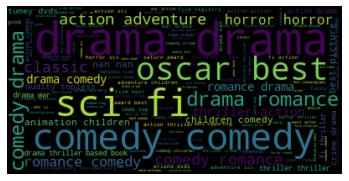

In [94]:
from wordcloud import WordCloud

# Start with one review:
text = ' '.join(list(tags['tags']))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Ratings

In [95]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [96]:
ratings.describe()

,user_id,movie_id,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


In [97]:
movies_rated = ratings['movie_id'].unique()

In [99]:
len(movies_rated)

3706

In [100]:
movies_in_movie_df = movies['movie_id'].unique()

In [101]:
len(movies_in_movie_df)

3883

In [104]:
difference = list(set(movies_rated) - set(movies_in_movie_df))

In [105]:
print(difference)

[]


There are no rated movies that we don't have information on

In [109]:
avg_rating = ratings['rating'].sum() / ratings['rating'].count()

In [113]:
print("average rating: " + str(avg_rating))

average rating: 3.581564453029317


Text(0, 0.5, 'Number of Movies')

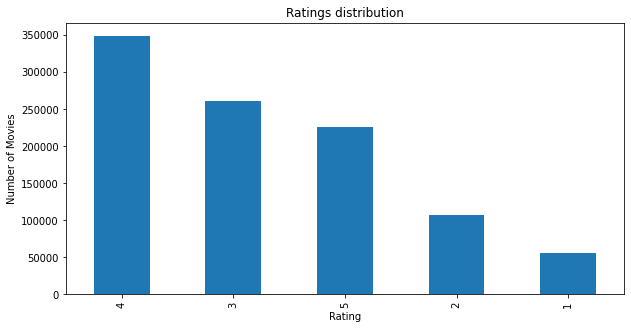

In [117]:
count_ratings = ratings['rating'].value_counts()

count_ratings.plot(kind='bar', figsize=(10, 5))

plt.title("Ratings distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")